In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

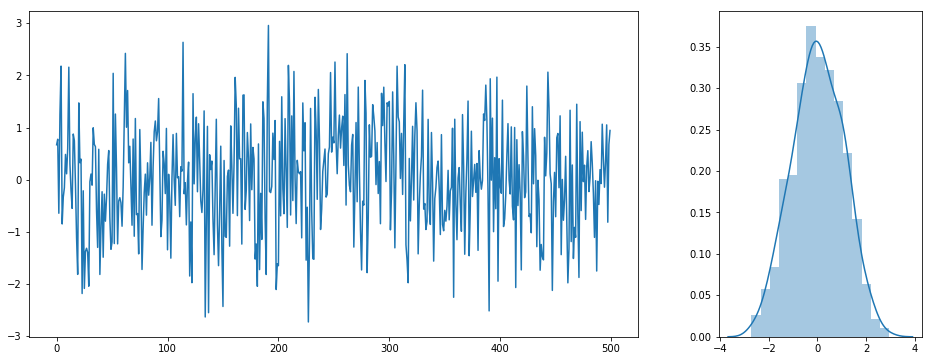

In [3]:
# fix some imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

n = 500
fig, ax = plt.subplots(1,2, figsize=(16, 6), gridspec_kw={'width_ratios':[3, 1]})
eps = np.random.normal(size=n)
ax[0].plot(eps)
sns.distplot(eps, ax=ax[1])

In [9]:
def lag_view(x, order):
    """
    For every value X_i create a row that lags k values: [X_i-1, X_i-2, ... X_i-k]
    """
    y = x.copy()
    # Create features by shifting the window of `order` size by one step.
    # This results in a 2D array [[t1, t2, t3], [t2, t3, t4], ... [t_k-2, t_k-1, t_k]]
    x = np.array([y[-(i + order):][:order] for i in range(y.shape[0])])
    
    # Reverse the array as we started at the end and remove duplicates.
    # Note that we truncate the features [order -1:] and the labels [order]
    # This is the shifting of the features with one time step compared to the labels
    x = np.stack(x)[::-1][order - 1: -1]
    y = y[order:]

    return x, y
lag_view(np.arange(7), 3)

(array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]), array([3, 4, 5, 6]))

In [14]:
theta = np.arange(6)
theta

array([0, 1, 2, 3, 4, 5])

In [16]:
theta = np.array([1] + list(theta))[::-1][:, None]
eps_q, _ = lag_view(eps, len(theta))

In [17]:
eps_q

array([[ 0.67188732,  0.77781818, -0.64102694, ...,  2.17961672,
        -0.84632628, -0.33103097],
       [ 0.77781818, -0.64102694,  1.257964  , ..., -0.84632628,
        -0.33103097, -0.15312961],
       [-0.64102694,  1.257964  ,  2.17961672, ..., -0.33103097,
        -0.15312961,  0.48631399],
       ...,
       [ 0.19498644, -0.0717138 ,  1.06628951, ..., -0.14162783,
         0.35394406,  1.05300383],
       [-0.0717138 ,  1.06628951,  0.42573518, ...,  0.35394406,
         1.05300383, -0.81286475],
       [ 1.06628951,  0.42573518, -0.14162783, ...,  1.05300383,
        -0.81286475,  0.67877867]])

In [11]:
theta

array([[0.88850648],
       [0.9700974 ],
       [0.60165625],
       [0.71588355],
       [0.75268431],
       [0.70701131],
       [0.14377281],
       [0.87479227],
       [0.55452366],
       [0.88948173],
       [0.41719929],
       [1.        ]])

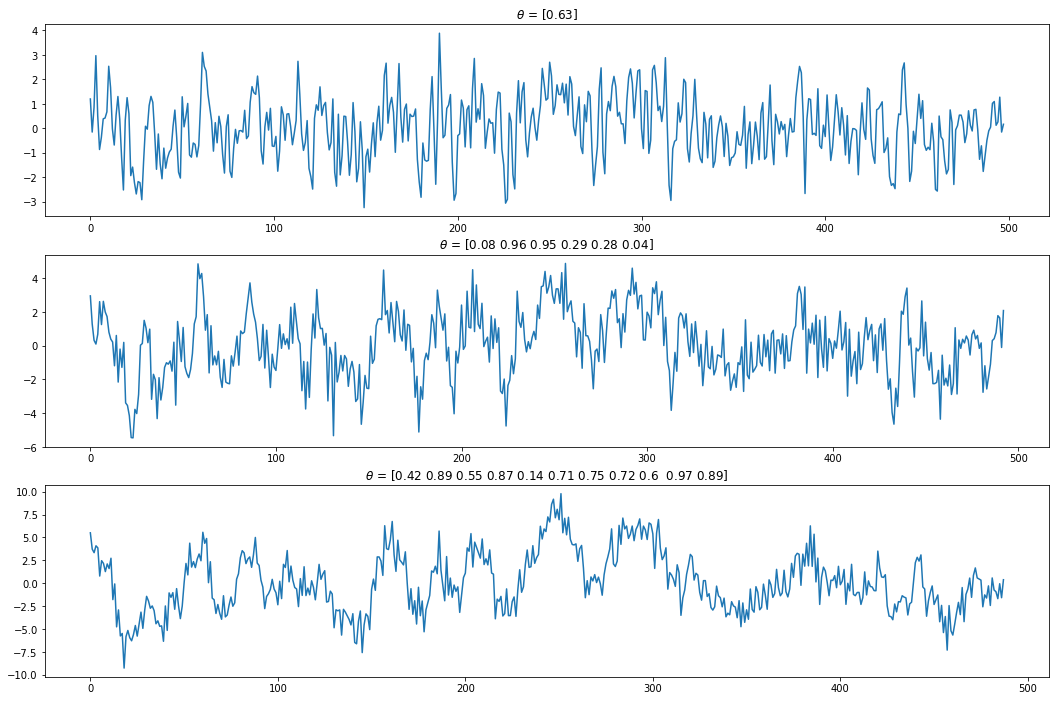

In [8]:
def ma_process(eps, theta):
    """
    Creates an MA(q) process with a zero mean (mean not included in implementation).
    :param eps: (array) White noise signal.
    :param theta: (array/ list) Parameters of the process.
    """
    # reverse the order of theta as Xt, Xt-1, Xt-k in an array is Xt-k, Xt-1, Xt.
    theta = np.array([1] + list(theta))[::-1][:, None]
    eps_q, _ = lag_view(eps, len(theta))
    return eps_q @ theta

fig = plt.figure(figsize=(18, 4 * 3))
a = 310
for i in range(0, 11, 5):
    a += 1
    theta = np.random.uniform(0, 1, size=i + 1)
    plt.subplot(a)
    plt.title(f'$\\theta$ = {theta.round(2)}')
    plt.plot(ma_process(eps, theta))

In [21]:
phi = np.r_[1, phi][::-1] 
phi.shape

(12,)

In [65]:
range(len(phi), eps.shape[0])

range(12, 500)

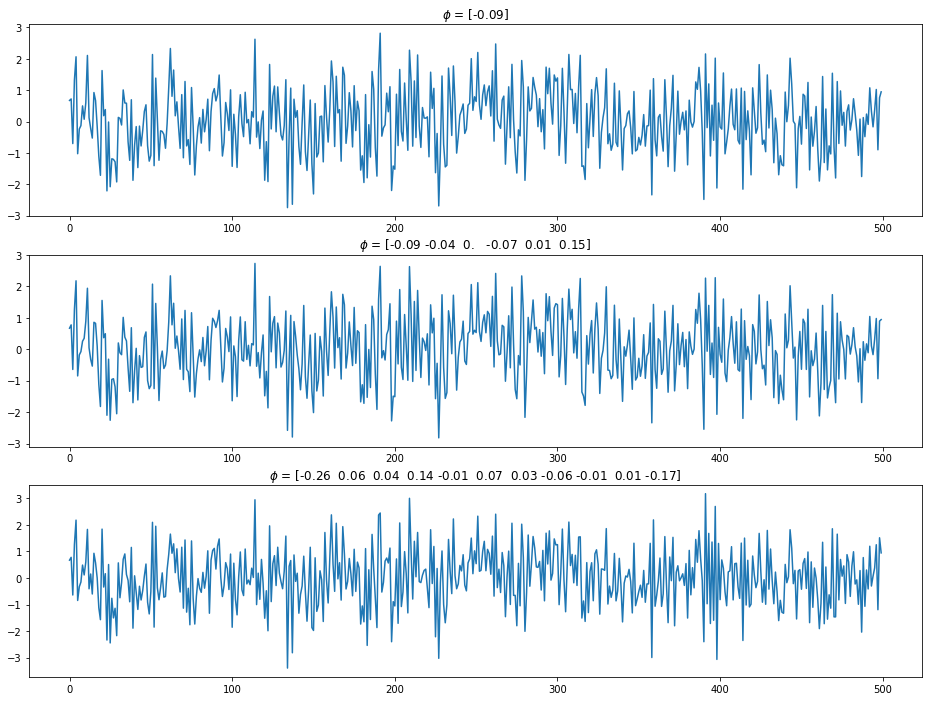

In [85]:
def ar_process(eps, phi):
    """
    Creates a AR process with a zero mean.
    """
    # Reverse the order of phi and add a 1 for current eps_t
    phi = np.r_[1, phi][::-1] 
    ar = eps.copy()
    offset = len(phi)
    for i in range(offset, ar.shape[0]):
        ar[i - 1] = ar[i - offset: i] @ phi
    return ar

fig = plt.figure(figsize=(16, 4 * 3))
a = 310
for i in range(0, 11, 5):
    a += 1
    phi = np.random.normal(0, 0.1, size=i + 1)
    plt.subplot(a)
    plt.title(f'$\\phi$ = {phi.round(2)}')
    out = ar_process(eps, phi)
    plt.plot(ar_process(eps, phi))

In [114]:
out[20:35]

array([ 1.84146026, -0.34086679,  0.16222267, -2.33792103,  0.50739029,
       -2.44598119, -0.76475061, -1.50407022, -1.14019959, -2.172606  ,
        0.56960308, -0.74447779, -0.17248184,  0.70476269,  0.90643745])

In [88]:
# Reverse the order of phi and add a 1 for current eps_t
phi = np.r_[1, phi][::-1] 
ar = eps.copy()
offset = len(phi)
i = offset

In [117]:
ar[i - 1] = ar[i - offset: i] @ phi
i+=1
ar[20:35]

array([ 1.84146026, -0.34086679,  0.16222267, -2.33792103,  0.50739029,
       -2.44598119, -0.76475061, -1.50407022, -1.14019959, -2.172606  ,
        0.56960308, -0.74447779, -0.10264906,  0.99717461,  0.67911329])

In [112]:
phi

array([-0.17278888,  0.00519812, -0.01315462, -0.06124105,  0.03049349,
        0.07272135, -0.00743757,  0.13664707,  0.0378543 ,  0.05544129,
       -0.26357547,  1.        ])

In [118]:
ar[i - offset: i]

array([-0.34086679,  0.16222267, -2.33792103,  0.50739029, -2.44598119,
       -0.76475061, -1.50407022, -1.14019959, -2.172606  ,  0.56960308,
       -0.74447779, -0.10264906])

In [119]:
np.dot(phi,ar[i - offset: i])

-0.17248184313145498

In [81]:
i = 12
# phi = np.r_[1, phi][::-1] 
offset = len(phi)
ar[i - offset: i] @ phi

1.3524699188880316

In [34]:
phi

array([ 1.        ,  0.00348351, -0.07674699,  0.1456519 , -0.14529139,
        0.08521167,  0.31481421, -0.03123321, -0.06906011, -0.08490153,
        0.08763329, -0.2021232 ,  1.        ,  1.        ])

In [45]:
eps

array([ 6.71887321e-01,  7.77818175e-01, -6.41026937e-01,  1.25796400e+00,
        2.17961672e+00, -8.46326277e-01, -3.31030967e-01, -1.53129609e-01,
        4.86313991e-01,  1.15137069e-01,  6.02480114e-01,  2.15879885e+00,
        3.07540738e-01, -2.12104279e-01, -5.47594597e-01,  8.77194334e-01,
        7.49394089e-01, -9.60647004e-02, -1.11910258e+00, -1.81300134e+00,
        1.47379995e+00,  3.27273323e-01,  3.96173957e-01, -2.17932883e+00,
       -2.10427389e-01, -2.08174196e+00, -1.37051524e+00, -1.31208414e+00,
       -1.39178551e+00, -2.03956514e+00, -3.75331998e-02,  1.10423983e-01,
       -1.02649063e-01,  9.97174608e-01,  6.79113292e-01,  6.35405942e-01,
       -5.98958497e-01, -1.29541845e+00,  5.85224498e-01, -1.81440750e+00,
       -9.18579233e-01, -2.28197912e-01, -1.48381249e+00, -2.74698185e-01,
       -7.92879039e-01, -3.52335430e-01,  2.97086841e-01,  5.61181457e-01,
       -7.27688628e-01, -1.33209563e+00, -1.19223763e+00,  2.04126351e+00,
       -1.22155694e+00,  